<a href="https://colab.research.google.com/github/AidaCPL/BC_Modeling-Sensitivity/blob/main/DHPP_Caculation/DHPP_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '/content/drive/MyDrive/Modelin and Sensitivity_Bass Connections/Copia de DHPP_2.xlsx'
data = pd.read_excel(file_path)
data = data.drop(columns=['Unnamed: 14','Unnamed: 15', 'Unnamed: 16','Unnamed: 17'])
data

,Name,Status,City,Province,Reference Unit Power [MW],Average Lifetime Load Factor (%),Predicted Average Load factor (3% increase),Predicted Average Load factor (5% increase),Construction start date,First grid Connection,Heating Days (by province),Heating Days (by city),DHPP,Unnamed: 13
0,FUQING-4,Operational,Fuqing,Fujian,1000,80.000000,82.400000,84.000000,2012-11-17 00:00:00,2017-07-29,129.265152,NaN,45331.34098,NaN
1,FUQING-3,Operational,Fuqing,Fujian,1000,82.800000,85.284000,86.940000,2010-12-31 00:00:00,2016-09-07,129.265152,NaN,46917.93791,NaN
2,FUQING-5,Operational,Fuqing,Fujian,1075,83.100000,85.593000,87.255000,2015-05-07 00:00:00,2020-11-27,129.265152,NaN,50619.52522,NaN
3,FUQING-6,Operational,Fuqing,Fujian,1075,84.100000,86.623000,88.305000,2015-12-22 00:00:00,2022-01-01,129.265152,NaN,51228.66512,NaN
4,FUQING-1,Operational,Fuqing,Fujian,1000,85.000000,87.550000,89.250000,2008-11-21 00:00:00,2014-08-20,129.265152,NaN,48164.54979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,SANAO-2,Under Construction,Wenzhou,Zhejiang,1117,88.154545,90.799182,92.562273,2021-12-30 00:00:00,NaT,144.043388,139.772727,62175.36300,NaN
155,Cangnan San'ao nuclear power plant 2-3,pre-construction,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN
156,Cangnan San'ao nuclear power plant 2-4,pre-construction,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN
157,Cangnan San'ao nuclear power plant 3-5,announced,Xiaguan,Zhejiang,1150,88.154545,90.799182,92.562273,NaN,NaT,144.043388,NaN,64012.23585,NaN


In [ ]:
# Adding DHPP by Province for each scenario

# 2024: Only "Operating"
dhpp_2024 = data[data['Status'] == 'Operational'].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2024.rename(columns={'DHPP': 'DHPP_2024'}, inplace=True)

In [ ]:
# 2030: "Operating" + "Under Construction"
dhpp_2030 = data[data['Status'].isin(['Operational', 'Under Construction'])].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2030.rename(columns={'DHPP': 'DHPP_2030'}, inplace=True)

# 2050: "Operating" + "Under Construction" + "Announced" + "Preconstruction"
dhpp_2050 = data[data['Status'].isin(['Operational', 'Under Construction', 'announced', 'pre-construction'])].groupby('Province')['DHPP'].sum().reset_index()
dhpp_2050.rename(columns={'DHPP': 'DHPP_2050'}, inplace=True)

In [ ]:
# Merge all scenarios into a single DataFrame for comparison
dhpp_summary = dhpp_2024.merge(dhpp_2030, on='Province', how='outer').merge(dhpp_2050, on='Province', how='outer')

# Display the result
dhpp_summary

,Province,DHPP_2024,DHPP_2030,DHPP_2050
0,Fujian,494278.209320,836654.834860,1.371969e+06
1,Guangdong,477748.436840,701247.602650,1.267027e+06
2,Guangxi,175017.445290,175017.445290,6.155650e+05
3,Hainan,11520.268943,31647.194716,3.164719e+04
4,Hebei,NaN,NaN,4.076797e+05
5,Jiangsu,349662.497420,480943.819200,4.809438e+05
6,Liaoning,323339.257360,546822.250200,1.087753e+06
7,Shandong,149051.441915,361816.542325,1.343934e+06
8,Zhejiang,471683.199710,717053.986850,1.373875e+06


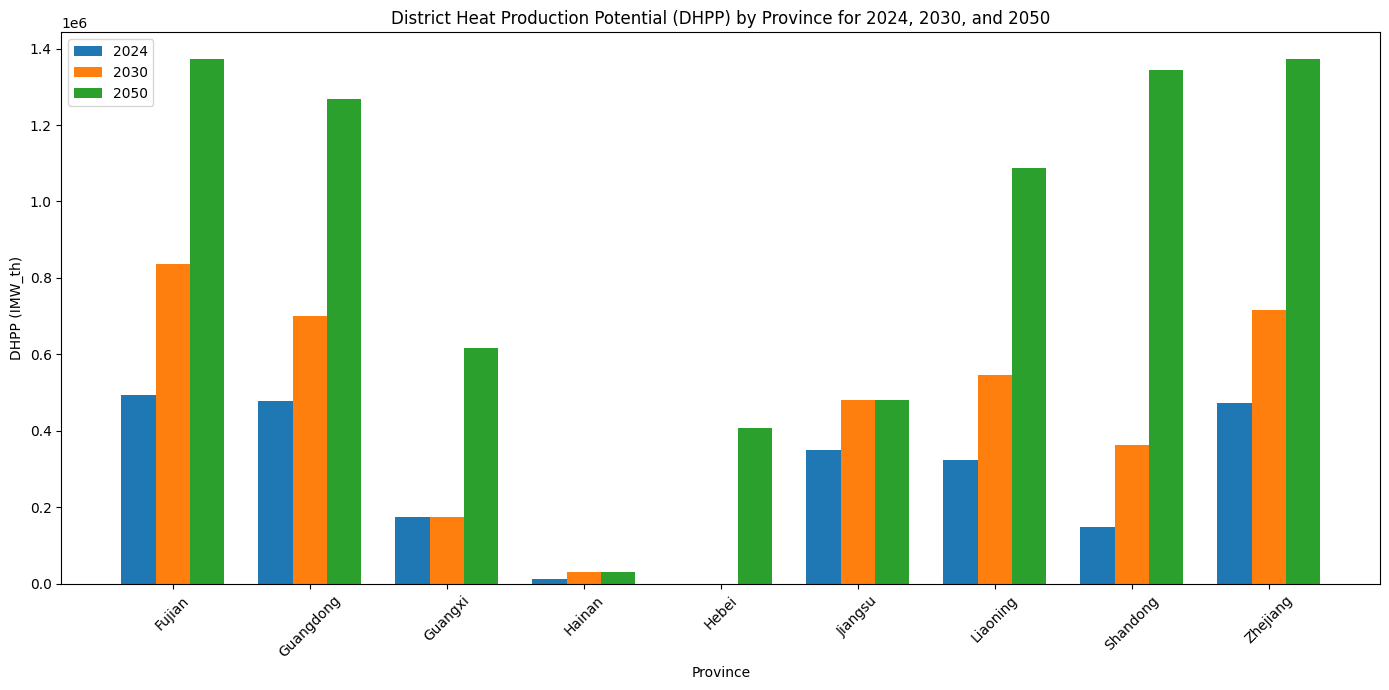

In [ ]:
import matplotlib.pyplot as plt

# Plotting the DHPP by province for 2024, 2030, and 2050
plt.figure(figsize=(14, 7))

# Bar width for the plot
bar_width = 0.25
index = range(len(dhpp_summary['Province']))

# Creating bars for 2024, 2030, and 2050
plt.bar(index, dhpp_summary['DHPP_2024'], bar_width, label='2024', align='center')
plt.bar([i + bar_width for i in index], dhpp_summary['DHPP_2030'], bar_width, label='2030', align='center')
plt.bar([i + 2 * bar_width for i in index], dhpp_summary['DHPP_2050'], bar_width, label='2050', align='center')

# Adding labels and title
plt.xlabel('Province')
plt.ylabel('DHPP (IMW_th)')
plt.title('District Heat Production Potential (DHPP) by Province for 2024, 2030, and 2050')
plt.xticks([i + bar_width for i in index], dhpp_summary['Province'], rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install geopandas

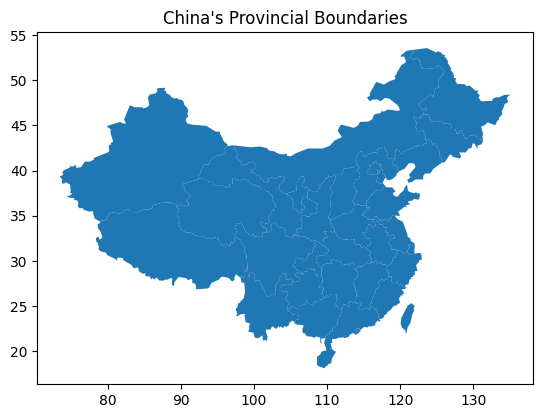

In [ ]:
import geopandas as gpd

china_map1 = gpd.read_file('/content/drive/MyDrive/Modelin and Sensitivity_Bass Connections/china.json')

# Plot the boundary data
china_map1.plot()
plt.title("China's Provincial Boundaries")
plt.show()

In [ ]:
# Display the first few rows to inspect the data
print(china_map1.head())

   id size      name  childNum  \
0  65  550  新疆维吾尔自治区        18   
1  54  550     西藏自治区         7   
2  15  450    内蒙古自治区        12   
3  63  800       青海省         8   
4  51  900       四川省        21   

                                            geometry  
0  POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9...  
1  POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79...  
2  POLYGON ((97.207 42.8027, 99.4922 42.583, 100....  
3  POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90...  
4  POLYGON ((101.7773 33.5303, 101.8652 33.5742, ...  


In [ ]:
# Dictionary for Chinese to English province name translation
province_translation = {
    "北京市": "Beijing",
    "天津市": "Tianjin",
    "上海市": "Shanghai",
    "重庆市": "Chongqing",
    "河北省": "Hebei",
    "山西省": "Shanxi",
    "辽宁省": "Liaoning",
    "吉林省": "Jilin",
    "黑龙江省": "Heilongjiang",
    "江苏省": "Jiangsu",
    "浙江省": "Zhejiang",
    "安徽省": "Anhui",
    "福建省": "Fujian",
    "江西省": "Jiangxi",
    "山东省": "Shandong",
    "河南省": "Henan",
    "湖北省": "Hubei",
    "湖南省": "Hunan",
    "广东省": "Guangdong",
    "海南省": "Hainan",
    "四川省": "Sichuan",
    "贵州省": "Guizhou",
    "云南省": "Yunnan",
    "陕西省": "Shaanxi",
    "甘肃省": "Gansu",
    "青海省": "Qinghai",
    "台湾省": "Taiwan",
    "内蒙古自治区": "Inner Mongolia",
    "广西壮族自治区": "Guangxi",
    "西藏自治区": "Tibet",
    "宁夏回族自治区": "Ningxia",
    "新疆维吾尔自治区": "Xinjiang",
    "香港特别行政区": "Hong Kong",
    "澳门特别行政区": "Macau"}

# Translate the province names in the 'name' column
china_map1['name_english'] = china_map1['name'].replace(province_translation)

# Display the first few rows to check translations
print(china_map1[['name', 'name_english']].head())


       name    name_english
0  新疆维吾尔自治区        Xinjiang
1     西藏自治区           Tibet
2    内蒙古自治区  Inner Mongolia
3       青海省         Qinghai
4       四川省         Sichuan


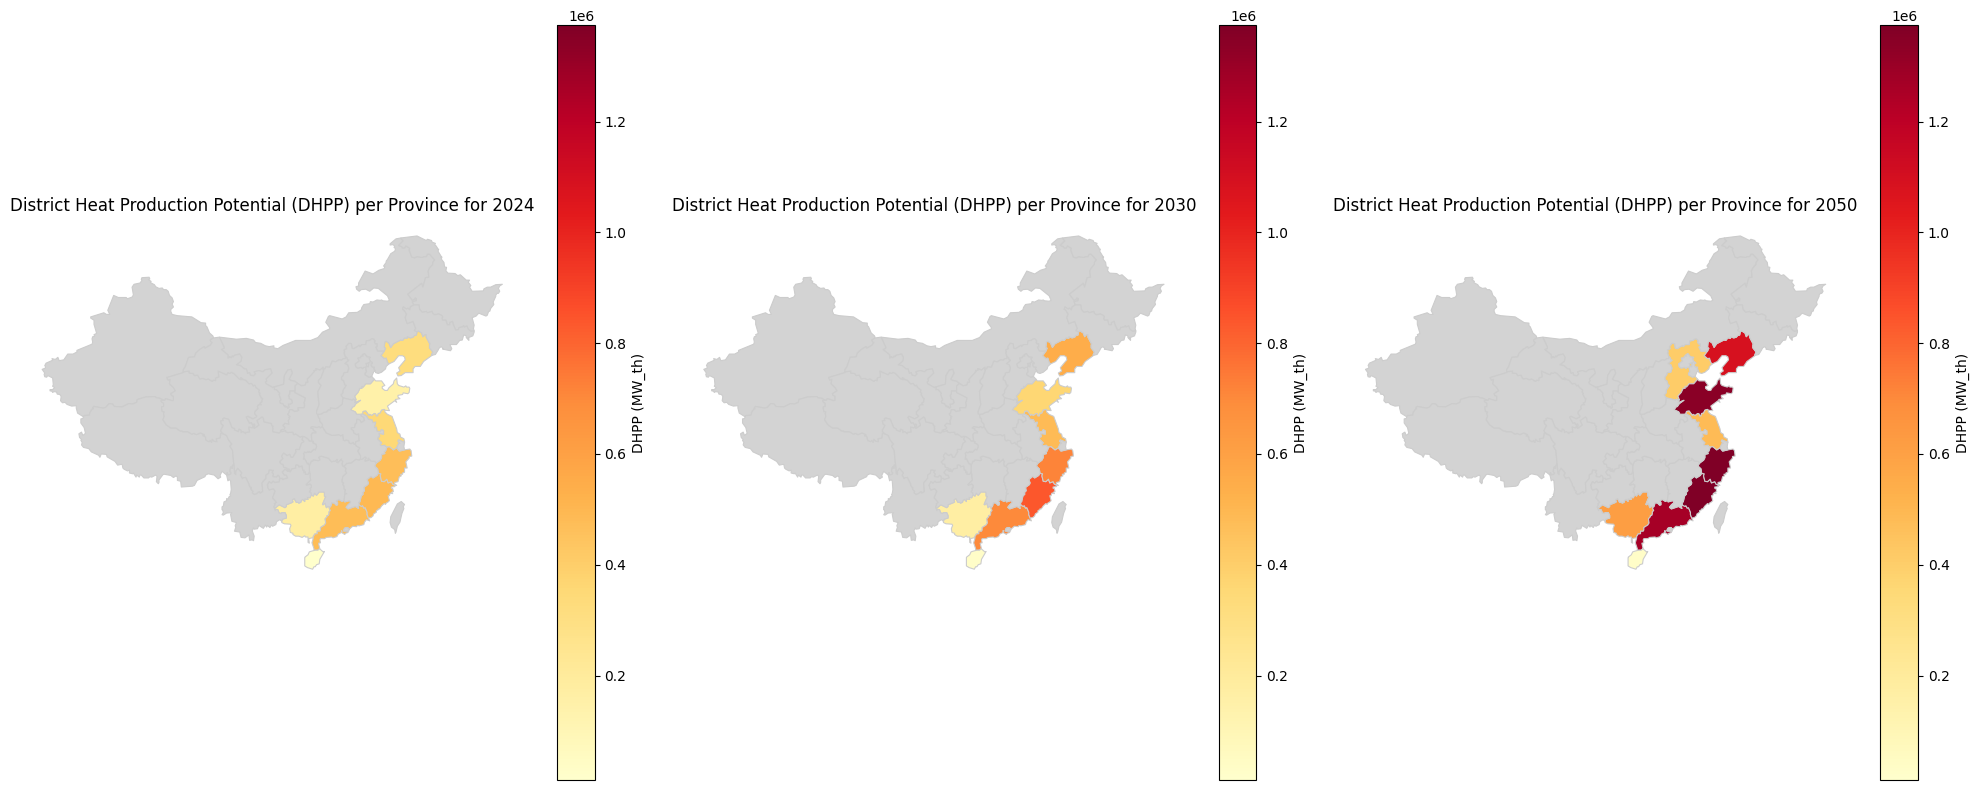

In [ ]:
# Merge the DHPP data with the GeoDataFrame, using 'name_english' as the province name column translated to english
china_map = china_map1.merge(dhpp_summary, left_on='name_english', right_on='Province', how='left')

# Define a common color map for consistent comparison
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
color_map = 'YlOrRd'

# Calculate the minimum and maximum values across multiple columns in the dhpp_summary df
vmin, vmax = dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].min().min(), dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].max().max()

# Plotting the heat maps for DHPP in 2024, 2030, and 2050
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Heat map for DHPP in 2024 with units in the legend
china_map.plot(
    column='DHPP_2024', cmap=color_map, linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'}, #map the rest of China's map
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[0].set_title('District Heat Production Potential (DHPP) per Province for 2024')
ax[0].axis('off')

# Heat map for DHPP in 2030 with units in the legend
china_map.plot(
    column='DHPP_2030', cmap=color_map, linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'},
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[1].set_title('District Heat Production Potential (DHPP) per Province for 2030')
ax[1].axis('off')

# Heat map for DHPP in 2050 with units in the legend
china_map.plot(
    column='DHPP_2050', cmap=color_map, linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=True,
    vmin=vmin, vmax=vmax, missing_kwds={'color': 'lightgray', 'label': 'No Data'},
    legend_kwds={'label': "DHPP (MW_th)"}
)
ax[2].set_title('District Heat Production Potential (DHPP) per Province for 2050')
ax[2].axis('off')

# Display the maps
plt.tight_layout()
plt.show()


In [ ]:
china_map1

,id,size,name,childNum,geometry,name_english
0,65,550,新疆维吾尔自治区,18,"POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9...",Xinjiang
1,54,550,西藏自治区,7,"POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79...",Tibet
2,15,450,内蒙古自治区,12,"POLYGON ((97.207 42.8027, 99.4922 42.583, 100....",Inner Mongolia
3,63,800,青海省,8,"POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90...",Qinghai
4,51,900,四川省,21,"POLYGON ((101.7773 33.5303, 101.8652 33.5742, ...",Sichuan
5,23,700,黑龙江省,13,"POLYGON ((121.4648 53.3496, 123.6621 53.5693, ...",Heilongjiang
6,62,690,甘肃省,14,"POLYGON ((96.416 42.7148, 97.207 42.8027, 97.8...",Gansu
7,53,1200,云南省,16,"POLYGON ((98.1738 28.125, 98.2617 28.3887, 98....",Yunnan
8,45,1450,广西壮族自治区,14,"POLYGON ((104.502 24.7412, 104.6777 24.6094, 1...",Guangxi
9,43,1700,湖南省,14,"POLYGON ((109.248 28.4766, 109.248 29.1357, 10...",Hunan


In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.graph_objects as go

# Merge DHPP data with the GeoDataFrame
china_map = china_map1.merge(dhpp_summary, left_on='name_english', right_on='Province', how='left')

# Define a common scale for all years
vmin = dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].min().min()
vmax = dhpp_summary[['DHPP_2024', 'DHPP_2030', 'DHPP_2050']].max().max()

# Prepare data for each year
data_2024 = china_map['DHPP_2024']
data_2030 = china_map['DHPP_2030']
data_2050 = china_map['DHPP_2050']

# Create the figure with traces for each year
fig = go.Figure()

# Add 2024 data
fig.add_trace(go.Choroplethmapbox(
    geojson=china_map.geometry.__geo_interface__,
    locations=china_map.index,
    z=data_2024,
    colorscale="YlOrRd",
    zmin=vmin,
    zmax=vmax,
    colorbar=dict(title="DHPP (MW_th)", titleside="right"),  # Color bar explicitly linked here
    hovertemplate="<b>%{customdata}</b><br>DHPP 2024: %{z}<extra></extra>",
    customdata=china_map['name_english'],  # Province names
    visible=True  # Default trace for 2024
))

# Add 2030 data
fig.add_trace(go.Choroplethmapbox(
    geojson=china_map.geometry.__geo_interface__,
    locations=china_map.index,
    z=data_2030,
    colorscale="YlOrRd",
    zmin=vmin,
    zmax=vmax,
    colorbar=dict(title="DHPP (MW_th)", titleside="right", showticklabels=True),  # Same color bar
    hovertemplate="<b>%{customdata}</b><br>DHPP 2030: %{z}<extra></extra>",
    customdata=china_map['name_english'],
    visible=False
))

# Add 2050 data
fig.add_trace(go.Choroplethmapbox(
    geojson=china_map.geometry.__geo_interface__,
    locations=china_map.index,
    z=data_2050,
    colorscale="YlOrRd",
    zmin=vmin,
    zmax=vmax,
    colorbar=dict(title="DHPP (MW_th)", titleside="right", showticklabels=True),  # Same color bar
    hovertemplate="<b>%{customdata}</b><br>DHPP 2050: %{z}<extra></extra>",
    customdata=china_map['name_english'],
    visible=False
))

# Set map layout
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=3,
        center={"lat": 35, "lon": 105}
    ),
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="2024",
                    method="update",
                    args=[
                        {"visible": [True, False, False]},  # Show 2024 trace
                        {"title": "District Heat Production Potential (DHPP) per Province (2024)"}
                    ]
                ),
                dict(
                    label="2030",
                    method="update",
                    args=[
                        {"visible": [False, True, False]},  # Show 2030 trace
                        {"title": "District Heat Production Potential (DHPP) per Province (2030)"}
                    ]
                ),
                dict(
                    label="2050",
                    method="update",
                    args=[
                        {"visible": [False, False, True]},  # Show 2050 trace
                        {"title": "District Heat Production Potential (DHPP) per Province (2050)"}
                    ]
                )
            ],
            direction="down",
            showactive=True,
        )
    ],
    title="District Heat Production Potential (DHPP) per Province",
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

# Display the map
fig.show()

# Save as HTML for external viewing
fig.write_html("dhpp_visualization.html")

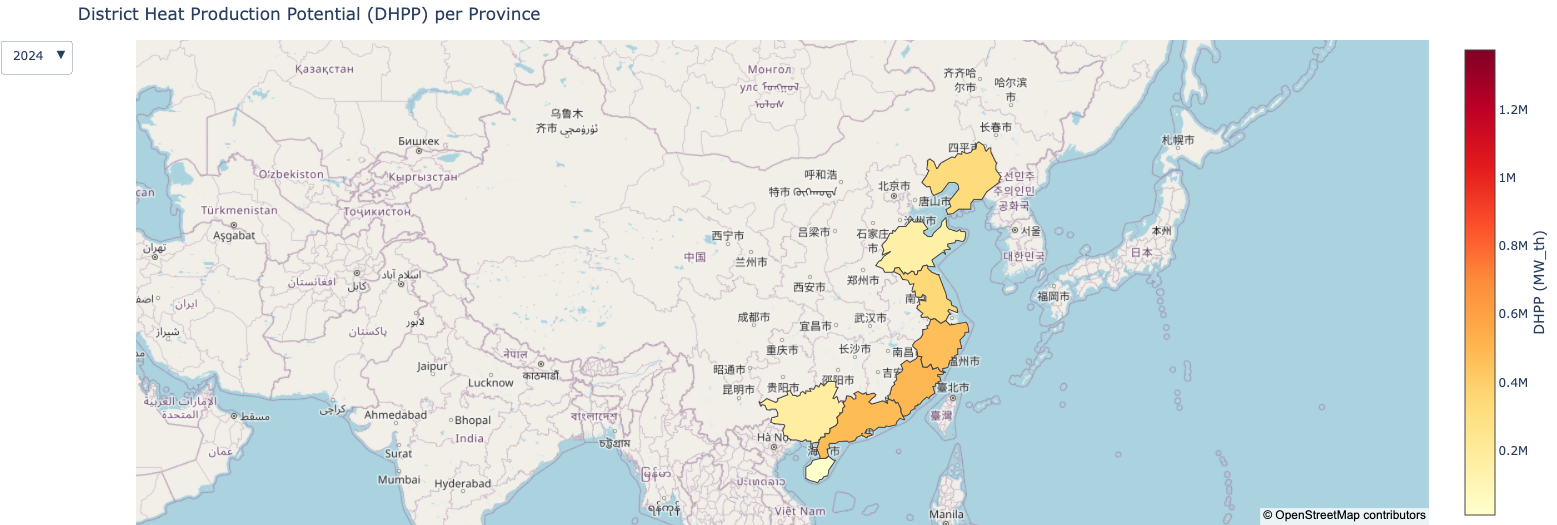